<h1 style="color:#323232;font-size:60px;font-family:Georgia;text-align:center;"><strong>Analysis of INC Companies</h1>

<h1 style="color:#323232;font-size:50px;font-family:Georgia;text-align:center;"><strong>Author: Owolabi Abdulquawiyy Adisa</b></h1>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#323232; font-size:50px;"><strong>Content<br> 
    
1. Overview
2. Dataset Information
3. Importing Libraries
4. Reading Dataset
5. Dataset Overview
6. EDA


# Overview

***INC 5000 Companies contains infomation about each companies on the INC 5000 list in 2019***

## The following are the fields (columns) in the dataset:-
1. `company name` : the name of each company in the dataset, this is stored in string
2. `profile` : the website of the company sotred in string
3. `state`
4. `revenue`
5. `growth`: Growth rate for each comapany
6. `industry` 
7. `workers`: No of workers currently working at the company
8. `previous_workers`: Number of workers that worked in 2018
9. `founded`: Year the company was founded
10. `yrs_on_list`
11. `metro`
12. `city`

# Import Libraries

The following libraries are going to be used:
1. `pandas`: for data processing 
2. `numpy`: for numerical analysis 
3. `seaborn`: for visuallization 
4. `matplotlib`: for vizualisation

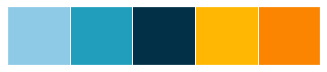

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.style as sty
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_specTrue

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rc('lines', lw=2, c='r')
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

colors = ["#8ecae6","#219ebc","#023047","#ffb703","#fb8500"]                       # colors to be used
sns.palplot(sns.color_palette(colors));

### Reading and viewing the file

In [2]:
df = pd.read_csv("INC 5000 Companies 2019.csv")

df.head()            # show first five rows of the dataset 

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


Let us check the headers of each column 

In [3]:
df.columns

Index(['rank', 'profile', 'name', 'url', 'state', 'revenue', 'growth_%',
       'industry', 'workers', 'previous_workers', 'founded', 'yrs_on_list',
       'metro', 'city'],
      dtype='object')

## Statistical Information

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rank,5012.0,2499.628292,1443.232009,1.0000,1249.7500,2497.50000,3749.25000,5000.0000
growth_%,5012.0,454.680059,1284.288709,52.1691,90.5625,157.53065,330.42725,36680.3882
workers,5011.0,242.783077,2800.165478,0.0000,22.0000,48.00000,116.00000,155000.0000
previous_workers,5012.0,111.687151,1073.878175,1.0000,8.0000,20.00000,50.00000,53000.0000
founded,5012.0,2005.445531,30.310632,0.0000,2003.0000,2009.00000,2012.00000,2016.0000
yrs_on_list,5012.0,2.813647,2.265986,1.0000,1.0000,2.00000,4.00000,14.0000


# Data Cleaning

Let us check for duplicated dataset.


Since the name of the company on the dataset should always be unique, we are going to use it to check for duplicated dataset

In [5]:
df[df.name.duplicated()]

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city


We don't have duplicated data

Check information about the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5012 non-null   int64  
 1   profile           5012 non-null   object 
 2   name              5012 non-null   object 
 3   url               5012 non-null   object 
 4   state             5012 non-null   object 
 5   revenue           5012 non-null   object 
 6   growth_%          5012 non-null   float64
 7   industry          5012 non-null   object 
 8   workers           5011 non-null   float64
 9   previous_workers  5012 non-null   int64  
 10  founded           5012 non-null   int64  
 11  yrs_on_list       5012 non-null   int64  
 12  metro             4199 non-null   object 
 13  city              5012 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 548.3+ KB


There are 5012 rows in the dataset with 2 columns `floating` points data type, 4  columns `integer` data type and 8 columns were stored as `object`.

Let us convert the `object` datatype to `string`

In [7]:
df = df.convert_dtypes()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5012 non-null   Int64  
 1   profile           5012 non-null   string 
 2   name              5012 non-null   string 
 3   url               5012 non-null   string 
 4   state             5012 non-null   string 
 5   revenue           5012 non-null   string 
 6   growth_%          5012 non-null   Float64
 7   industry          5012 non-null   string 
 8   workers           5011 non-null   Int64  
 9   previous_workers  5012 non-null   Int64  
 10  founded           5012 non-null   Int64  
 11  yrs_on_list       5012 non-null   Int64  
 12  metro             4199 non-null   string 
 13  city              5012 non-null   string 
dtypes: Float64(1), Int64(5), string(8)
memory usage: 577.7 KB


Check for total null entry for each column of the dataset

In [8]:
df.isnull().sum()

rank                  0
profile               0
name                  0
url                   0
state                 0
revenue               0
growth_%              0
industry              0
workers               1
previous_workers      0
founded               0
yrs_on_list           0
metro               813
city                  0
dtype: int64

The `workers` column has  null entry while the `metro` column has 813 null entries.

Let us check the worker's null entry 

In [9]:
df.sort_values('workers', ascending=False).tail(5)

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
1973,1970,https://www.inc.com/profile/synapse-business-s...,Synapse Business Systems,synapsebsystems.com,VA,3 Million,204.0911,IT Management,0,4,2013,1,"Washington, DC",Fairfax
4567,4556,https://www.inc.com/profile/ids-international-...,IDS International Government Services,idsinternational.com,VA,44.7 Million,64.0436,Government Services,0,682,2006,3,"Washington, DC",Arlington
4942,4931,https://www.inc.com/profile/green-mountain-tec...,Green Mountain Technology,greenmountaintechnology.com,TN,21.6 Million,54.2047,Logistics & Transportation,0,48,1999,3,<NA>,Memphis
245,245,https://www.inc.com/profile/tier4-group,Tier4 Group,http://tier4group.com,GA,4.6 Million,1729.3981,Business Products & Services,0,3,2010,1,Atlanta,Atlanta
3755,3746,https://www.inc.com/profile/mansari,Mansari,https://www.collegehunkshaulingjunk.com/tampa-...,FL,2.5 Million,90.7485,Consumer Products & Services,<NA>,20,2008,1,Tampa,Tampa


In [10]:
df.at[3755, 'workers'] = 0


df.at[3755, 'workers']

0

Since the `metro`, `rank`, `url` and `profile` columns are of no us, we are going to drop them

In [11]:
df.drop(['metro', 'rank', 'url', 'profile'], axis = 1, inplace= True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5012 non-null   string 
 1   state             5012 non-null   string 
 2   revenue           5012 non-null   string 
 3   growth_%          5012 non-null   Float64
 4   industry          5012 non-null   string 
 5   workers           5012 non-null   Int64  
 6   previous_workers  5012 non-null   Int64  
 7   founded           5012 non-null   Int64  
 8   yrs_on_list       5012 non-null   Int64  
 9   city              5012 non-null   string 
dtypes: Float64(1), Int64(4), string(5)
memory usage: 416.2 KB


# Explanatory Data Analysis (EDA)

In this section, we shall deal with the following:

1. Average revenue among the companies in each state, industry and city.
2. Most and least represnted industries in the list
3. Rate of recruitment in each industry
4. Relationship between workers and growth
5. Relationship between workers and revenue|

## Revenue

Let us deal with revenue column and get some insight. The revenue column would be recorded as numerical

In [13]:
df[['revenue', 'size']]= df.revenue.str.split(' ', expand=True)


df.head()

,name,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,city,size
0,Freestar,AZ,36.9,36680.3882,Advertising & Marketing,40,5,2015,1,Phoenix,Million
1,FreightWise,TN,33.6,30547.9317,Logistics & Transportation,39,8,2015,1,Brentwood,Million
2,Cece's Veggie Co.,TX,24.9,23880.4852,Food & Beverage,190,10,2015,1,Austin,Million
3,LadyBoss,NM,32.4,21849.8925,Consumer Products & Services,57,2,2014,1,Albuquerque,Million
4,Perpay,PA,22.5,18166.407,Retail,25,6,2014,1,Philadelphia,Million


In [14]:
# replace million and billion in millions column by numerical values

recode = {'Million': 1000000, 'Billion': 1000000000}
df['size']= df['size'].map(recode)

# convert revenue column to numeric datatype

df['revenue'] = pd.to_numeric(df['revenue'])

# multiply the values by the revenue column

df['revenue'] = df.revenue * df.size

# view dataset

df.head()


,name,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,city,size
0,Freestar,AZ,2034370.8,36680.3882,Advertising & Marketing,40,5,2015,1,Phoenix,1000000
1,FreightWise,TN,1852435.2,30547.9317,Logistics & Transportation,39,8,2015,1,Brentwood,1000000
2,Cece's Veggie Co.,TX,1372786.8,23880.4852,Food & Beverage,190,10,2015,1,Austin,1000000
3,LadyBoss,NM,1786276.8,21849.8925,Consumer Products & Services,57,2,2014,1,Albuquerque,1000000
4,Perpay,PA,1240470.0,18166.407,Retail,25,6,2014,1,Philadelphia,1000000


In [15]:
# drop size column

df.drop('size', axis = 1, inplace = True)

Let us analysis the average revenue among the cmapanies on the list by `industry`, `state` and `city`.

In [16]:
revenue_by_ind= df.groupby('industry')[['industry', 'revenue']].mean()

revenue_by_ind

,revenue
industry,
Advertising & Marketing,1.042457e+06
Business Products & Services,1.464931e+06
Computer Hardware,1.718912e+06
Construction,2.009262e+06
Consumer Products & Services,1.350857e+06
Education,1.148715e+06
Energy,2.445670e+06
Engineering,1.816838e+06
Environmental Services,1.240855e+06


Revenue by State

In [17]:
revenue_by_state= df.groupby('state')[['state', 'revenue']].mean()

revenue_by_state

,revenue
state,
AL,2.045914e+06
AR,6.274022e+05
AZ,1.275564e+06
CA,1.498460e+06
CO,1.224036e+06
CT,1.091465e+06
DC,1.047508e+06
DE,1.707087e+06
FL,1.675769e+06


In [18]:
revenue_by_city= df.groupby('city')[['city', 'revenue']].mean()

revenue_by_city_top= revenue_by_city.head(5)
revenue_by_city_5 = revenue_by_city.tail()

In [19]:
# top10 most represented industries

industry_no = df.industry.value_counts().head(10)

In [20]:
# top10 least represented industries

least_industry_no = df.industry.value_counts().tail(10)

In [21]:
least_industry_no

Telecommunications        79
Energy                    78
Insurance                 70
Education                 70
Security                  67
Travel & Hospitality      57
Media                     46
Environmental Services    43
IT Services               43
Computer Hardware         32
Name: industry, dtype: Int64

In [22]:
color_palette=["#8ecae6","#0e4f66"]
background_color = '#fafafa'
#style.use("fivethirtyeight")
fig = plt.figure(figsize=(60,50), dpi=250)
fig.patch.set_facecolor(background_color) # figure background color
gs = fig.add_gridspec(2, 2)
gs.update(wspace=.6, hspace=.3)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

ax0 = sns.barplot(ax = ax0, y= revenue_by_ind.index, x = revenue_by_ind.revenue)
ax0.set_xlabel('Industry', fontsize = 30, fontfamily = 'serif')
ax0.set_ylabel('Average Revenue', fontsize = 30, fontfamily = 'serif')
ax0.set_title('Average Revenue by Industry',fontfamily = 'serif', fontsize=50, fontweight = 'bold', loc='center')

ax1 = sns.barplot(ax = ax1, y= revenue_by_state.index, x = revenue_by_state.revenue)
ax1.set_xlabel('Average Revenue', fontsize = 30, fontfamily = 'serif')
ax1.set_ylabel('State', fontsize = 30, fontfamily = 'serif')
ax1.set_title('Average Revenue by State',fontfamily = 'serif', fontsize=50, fontweight = 'bold', loc='center')


ax2 = sns.barplot(ax = ax2, x= revenue_by_city_top.index, y = revenue_by_city_top.revenue, palette = colors)
ax2.set_xlabel('City', fontsize = 30, fontfamily = 'serif')
ax2.set_ylabel('Average Revenue', fontsize = 30, fontfamily = 'serif')
ax2.set_title('Top Five (5) City with Highest Average Revenue' ,fontfamily = 'serif', fontsize=50, fontweight = 'bold', loc='center')


ax3 = sns.barplot(ax = ax3, x= revenue_by_city_5.index,y = revenue_by_city_5.revenue,palette = colors)
ax3.set_xlabel('City', fontsize = 30, fontfamily = 'serif')
ax3.set_ylabel('Average Revenue', fontsize = 30, fontfamily = 'serif')
ax3.set_title('Top Five (5) City with Least Average Revenue',fontfamily = 'serif', fontsize=50, fontweight = 'bold', loc='center')


plt.show()

## Industry

**Top10 most represented industries**


In [23]:
industry_no = df.industry.value_counts().head(5)

industry_no         # View

Business Products & Services    492
Advertising & Marketing         489
Software                        461
Health                          356
Construction                    350
Name: industry, dtype: Int64

**Top 5 Least Represented industry**

In [24]:
industry_no_5= df.industry.value_counts().tail(5)

industry_no_5        # View

Travel & Hospitality      57
Media                     46
Environmental Services    43
IT Services               43
Computer Hardware         32
Name: industry, dtype: Int64

<Figure size 10000x7500 with 0 Axes>

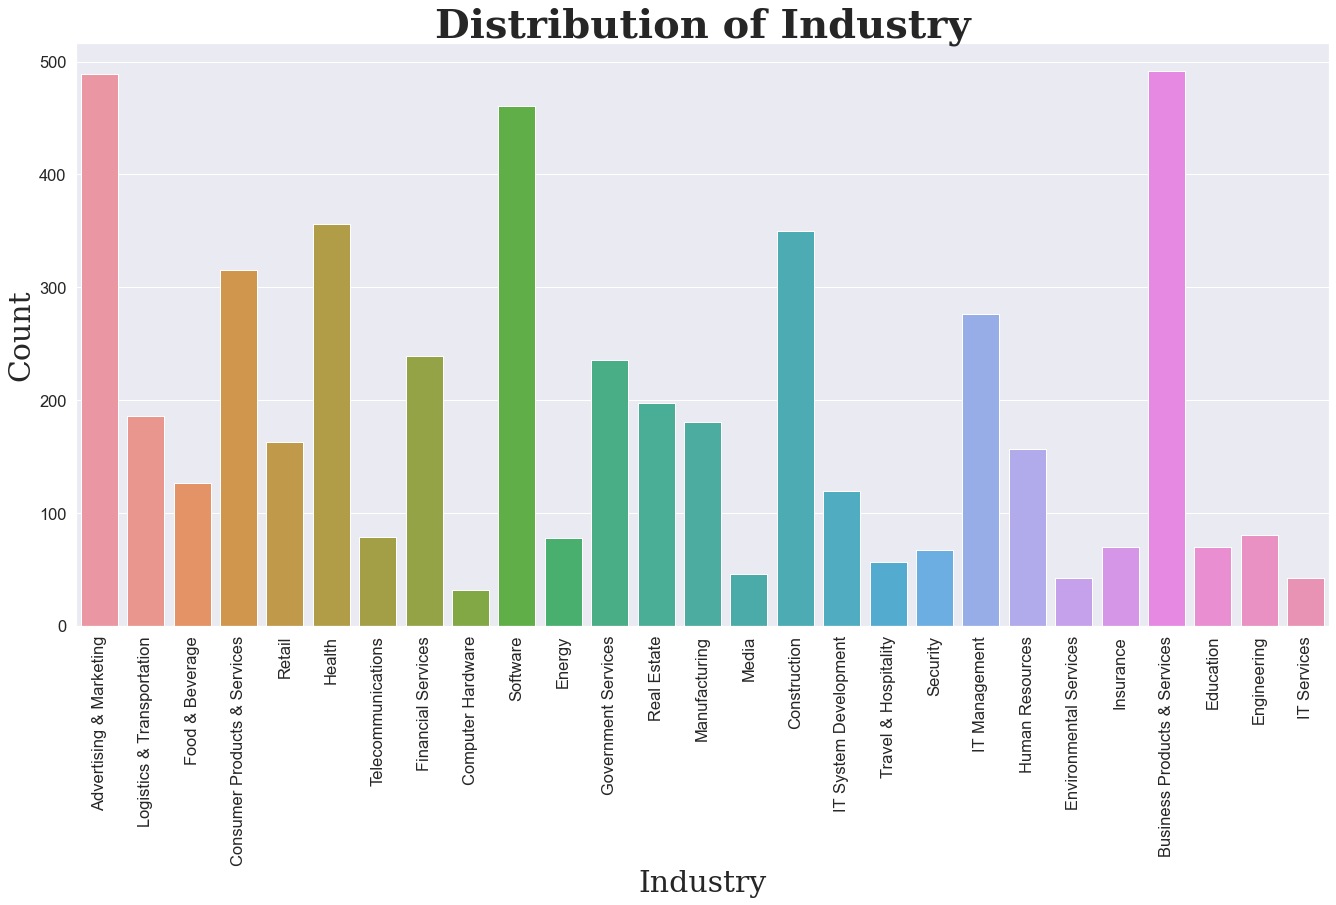

In [25]:
color_palette=["#8ecae6","#0e4f66"]
background_color = '#fafafa'
#style.use("fivethirtyeight")
fig = plt.figure(figsize=(40,30), dpi=250)
fig.patch.set_facecolor(background_color) 

plt.figure(figsize=(20, 10));
sns.countplot(x = 'industry', data = df)
plt.xticks(rotation = 90)
plt.xlabel('Industry', fontsize = 30, fontfamily = 'serif')
plt.ylabel('Count', fontsize = 30, fontfamily = 'serif')
plt.title('Distribution of Industry',fontfamily = 'serif', fontsize=40, fontweight = 'bold', loc='center');


plt.show()

## State

**Top 10 most represented State**

In [26]:
state_no = df.state.value_counts().head(5)

state_no         # View

CA    712
TX    467
FL    385
NY    300
VA    288
Name: state, dtype: Int64

**Top 10 least represented state**

In [27]:
state_no = df.state.value_counts().tail(5)

state_no         # View

VT    5
RI    5
MS    4
HI    4
PR    2
Name: state, dtype: Int64

<Figure size 10000x7500 with 0 Axes>

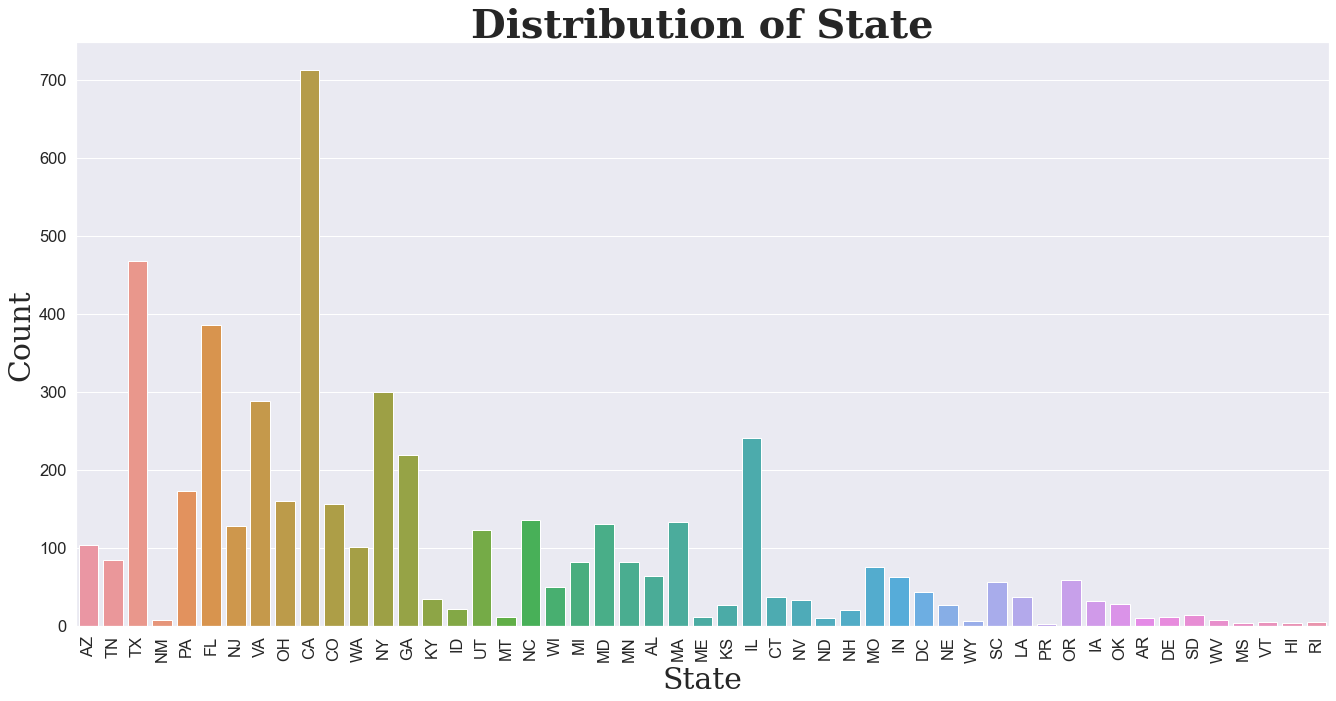

In [28]:
color_palette=["#8ecae6","#0e4f66"]
background_color = '#fafafa'
#style.use("fivethirtyeight")
fig = plt.figure(figsize=(40,30), dpi=250)
fig.patch.set_facecolor(background_color) 

plt.figure(figsize=(20, 10));
sns.countplot(x = 'state', data = df)
plt.xticks(rotation = 90)
plt.xlabel('State', fontsize = 30, fontfamily = 'serif')
plt.ylabel('Count', fontsize = 30, fontfamily = 'serif')
plt.title('Distribution of State',fontfamily = 'serif', fontsize=40, fontweight = 'bold', loc='center');


plt.show()

## Growth

Let us analysis state that has highest growth and the industry in the state

In [29]:
growth_ind = df.groupby('industry')[['industry', 'growth_%', 'state']].mean()

growth_ind_top = growth_ind.sort_values('growth_%',ascending=False).head()

growth_ind_top

,growth_%
industry,
Logistics & Transportation,717.563346
Consumer Products & Services,685.6403
Food & Beverage,668.225534
Computer Hardware,651.975244
Energy,592.075591


In [30]:
growth_ind_least = growth_ind.sort_values('growth_%',ascending=False).tail()

growth_ind_least

,growth_%
industry,
Insurance,306.150356
Human Resources,288.708354
IT Management,275.364626
Engineering,222.757926
IT Services,70.583881


In [31]:
growth_state = df.groupby('state')[['state', 'growth_%']].mean()

growth_state_top = growth_state.sort_values('growth_%',ascending=False).head()

growth_state_top

,growth_%
state,
NM,3259.421014
ID,1335.740329
PR,1109.55435
MT,830.761427
TN,734.200479


In [32]:
growth_state_least = growth_state.sort_values('growth_%',ascending=False).tail()

growth_state_least

,growth_%
state,
SD,192.124507
HI,173.525025
MS,143.736525
VT,139.8579
RI,95.2839


In [41]:
color_palette=["#8ecae6","#0e4f66"]
background_color = '#fafafa'
#style.use("fivethirtyeight")
fig = plt.figure(figsize=(60,60), dpi=250)
fig.patch.set_facecolor(background_color) # figure background color
gs = fig.add_gridspec(2, 1)
gs.update(wspace=.6, hspace=.3)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])


ax0 = sns.barplot(ax = ax0, x= growth_ind.index, y = 'growth_%', data=growth_ind)
ax0.set_xlabel('Industry', fontsize = 30, fontfamily = 'serif')
ax0.set_ylabel('Average Growth', fontsize = 30, fontfamily = 'serif')
ax0.set_title('Average Growth by Industry',fontfamily = 'serif', fontsize=50, fontweight = 'bold', loc='center')

ax1 = sns.barplot(ax = ax1, x = growth_state.index, y = 'growth_%', data = growth_state)
ax1.set_xlabel('State', fontsize = 30, fontfamily = 'serif')
ax1.set_ylabel('Average Growth', fontsize = 30, fontfamily = 'serif')
ax1.set_title('Average Growth by State',fontfamily = 'serif', fontsize=50, fontweight = 'bold', loc='center')


plt.show()

## Workers

In [45]:
df['worker_change'] = df.workers - df.previous_workers

df.sort_values('worker_change', ascending=False).head()

,name,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,city,worker_change
1621,Allied Universal,CA,319765.6,255.1902,Security,155000,36469,1957,10,Santa Ana,118531
3752,Alorica,CA,121290.4,90.9001,Business Products & Services,96000,53000,1999,2,Irvine,43000
3403,Infiniti HR,MD,25250456.0,104.7641,Human Resources,58145,21000,2008,7,Burtonsville,37145
1336,CircusTrix,UT,10701121.2,309.4015,Advertising & Marketing,14730,991,2011,3,Provo,13739
3172,ScribeAmerica,FL,16820773.2,115.8777,Health,20599,8958,2005,9,Fort Lauderdale,11641


In [68]:
worker_ind = df.groupby('industry')[['industry', 'worker_change']].sum()

worker_ind.head()

,worker_change
industry,
Advertising & Marketing,32599
Business Products & Services,89861
Computer Hardware,976
Construction,21869
Consumer Products & Services,18032


In [78]:
revenue_by_ind

,revenue
industry,
Advertising & Marketing,1.042457e+06
Business Products & Services,1.464931e+06
Computer Hardware,1.718912e+06
Construction,2.009262e+06
Consumer Products & Services,1.350857e+06
Education,1.148715e+06
Energy,2.445670e+06
Engineering,1.816838e+06
Environmental Services,1.240855e+06


<Figure size 10000x7500 with 0 Axes>

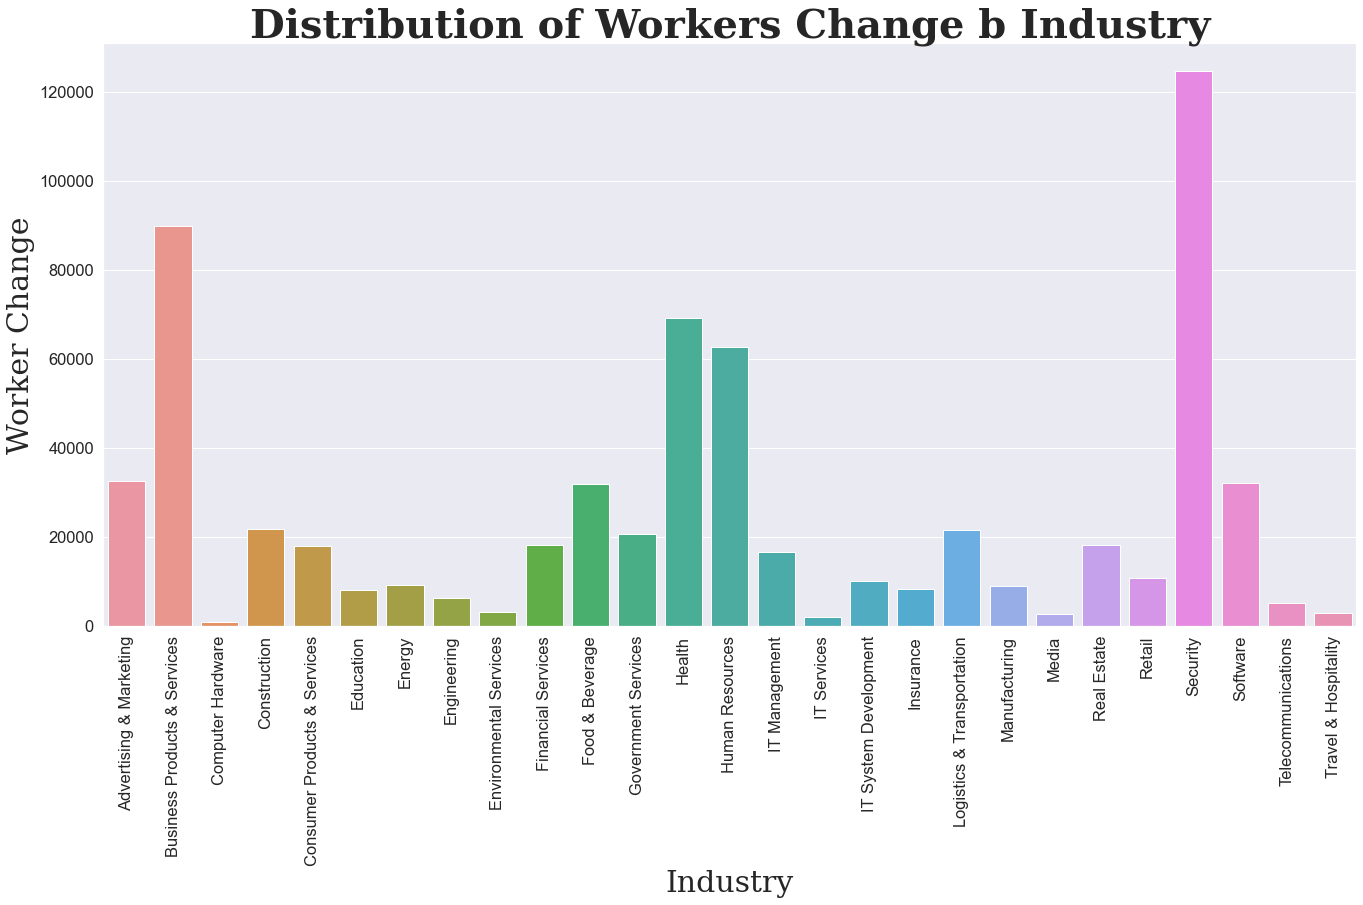

In [80]:
color_palette=["#8ecae6","#0e4f66"]
background_color = '#fafafa'
#style.use("fivethirtyeight")
fig = plt.figure(figsize=(40,30), dpi=250)
fig.patch.set_facecolor(background_color) 

plt.figure(figsize=(20, 10));
sns.barplot( y = worker_ind.worker_change ,x = worker_ind.index)
plt.xticks(rotation = 90)
plt.xlabel('Industry', fontsize = 30, fontfamily = 'serif')
plt.ylabel('Worker Change', fontsize = 30, fontfamily = 'serif')
plt.title('Distribution of Workers Change b Industry',fontfamily = 'serif', fontsize=40, fontweight = 'bold', loc='center');


plt.show()

### Relationship between growth and increse/ decrease in workers

In [82]:
revenue_worker = df.groupby('industry')[['industry', 'revenue', 'worker_change']].sum()

revenue_worker.head()

,revenue,worker_change
industry,,
Advertising & Marketing,509761498.4,32599
Business Products & Services,720746149.2,89861
Computer Hardware,55005196.4,976
Construction,703241739.2,21869
Consumer Products & Services,425519802.4,18032


In [87]:
revenue_worker.sort_values('revenue', ascending=False)

,revenue,worker_change
industry,,
Health,890067547.6,69226
Business Products & Services,720746149.2,89861
Construction,703241739.2,21869
Logistics & Transportation,548530320.8,21500
Software,548320819.2,32230
Financial Services,527117052.0,18145
Advertising & Marketing,509761498.4,32599
Government Services,475342590.8,20566
Consumer Products & Services,425519802.4,18032


<Figure size 10000x7500 with 0 Axes>

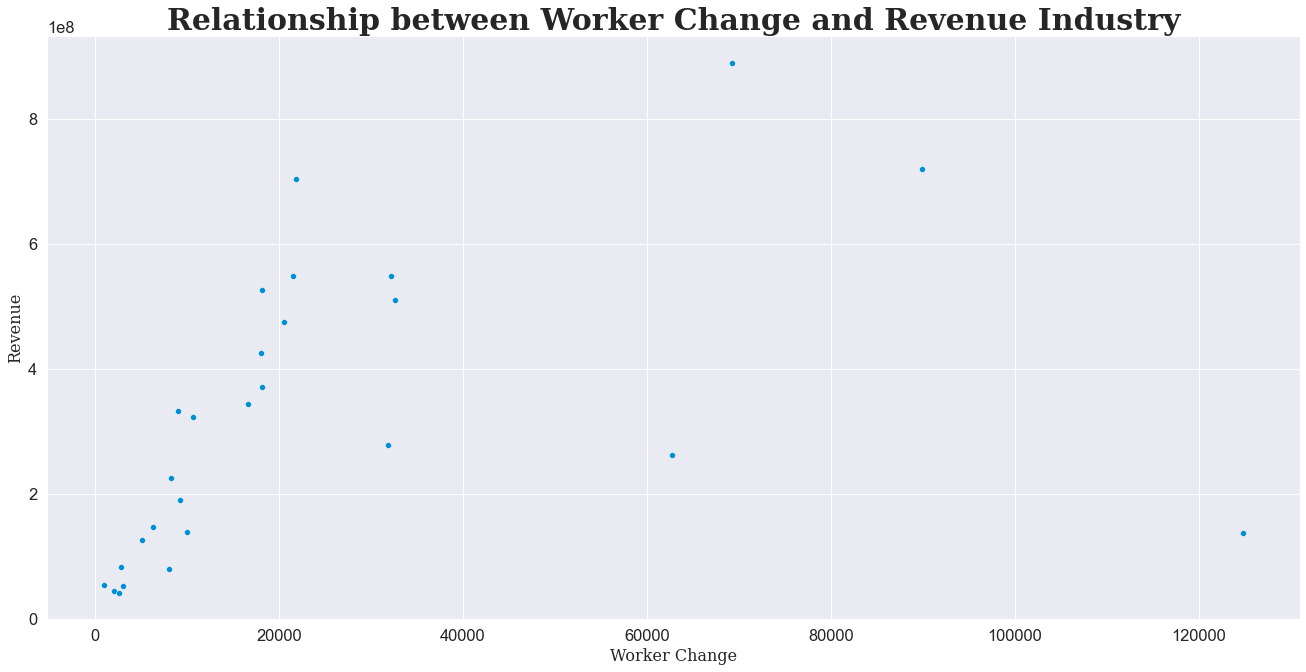

In [94]:
color_palette=["#8ecae6","#0e4f66"]
background_color = '#fafafa'
#style.use("fivethirtyeight")
fig = plt.figure(figsize=(40,30), dpi=250)
fig.patch.set_facecolor(background_color) 

plt.figure(figsize=(20, 10));
sns.scatterplot( y = revenue_worker.revenue ,x = revenue_worker.worker_change)
plt.xlabel('Worker Change', fontsize = 16 ,fontfamily = 'serif')
plt.ylabel('Revenue', fontsize = 16, fontfamily = 'serif')
plt.title('Relationship between Worker Change and Revenue Industry',fontfamily = 'serif', fontsize=30, fontweight = 'bold', loc='center');


plt.show()

It can be seen that as the workers are being increase, the revenurevenue tends to increase as well.

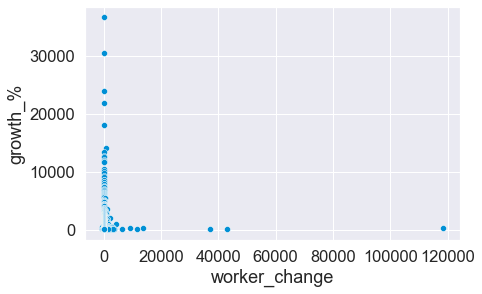

In [96]:
sns.scatterplot(x= df.worker_change, y = 'growth_%', data = df);

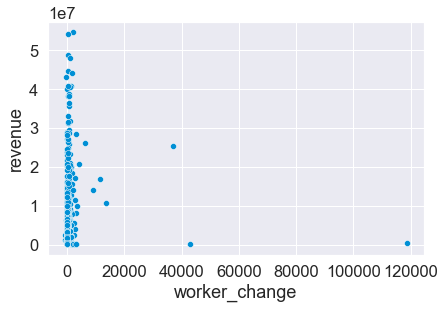

In [97]:
sns.scatterplot(x= df.worker_change, y = df.revenue, data = df);